## Problem 1

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

In [3]:
prob = stats.norm.sf(5)
stats.poisson.isf(prob, 100)

154.0

## Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

In [4]:
bkgrnd = stats.poisson.rvs(100, size = 1000000)
bkgrnd

array([ 74, 103,  78, ...,  88, 108,  93])

signal at 8 sigma

In [23]:
prob = stats.norm.sf(8)
signal = stats.poisson.isf(prob, 100)
signal = signal + 1
signal

191.0

In [6]:
data = bkgrnd + signal
max(data)

342.0

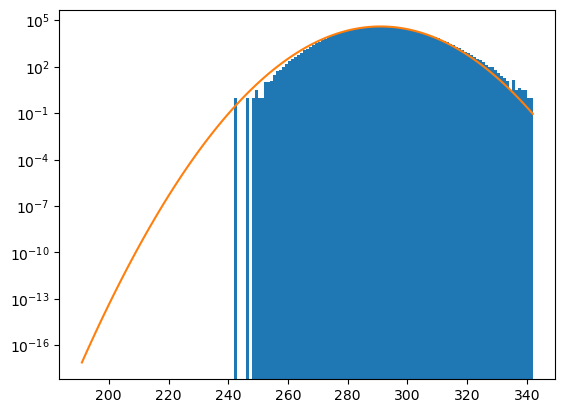

In [7]:
plt.hist(data, bins = 100)

x = np.linspace(191, max(data), 100)
y = stats.norm.pdf(x, loc = 291, scale=10)* 1000000
plt.plot(x, y)
plt.yscale('log')
plt.show()

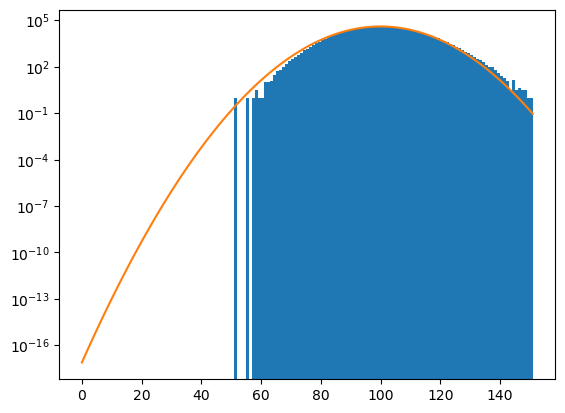

In [10]:
plt.hist(bkgrnd, bins = 100)
plt.yscale('log')
x = np.linspace(0, max(bkgrnd), 100)
y = stats.norm.pdf(x, loc = 100, scale=10)* 1000000
plt.plot(x, y)
plt.yscale('log')
plt.show()

it's appraching gaussian but not exactly.As it will apprach gaussian but never be gaussian.

b) there are no negative values for the background thus, its value can't be below the signal thus the value will be only above the signal

## Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

b) For the same injected signal power as in problem 2, show that you get the same answer.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

In [11]:
true_signal = np.random.uniform(0, 500, size=1000000)

In [12]:
true_signal

array([ 87.93962018, 414.37988144, 350.27189147, ...,  56.21662659,
        27.79372527, 499.0461916 ])

Text(0.5, 0, 'Observed data, $P(d|s)$')

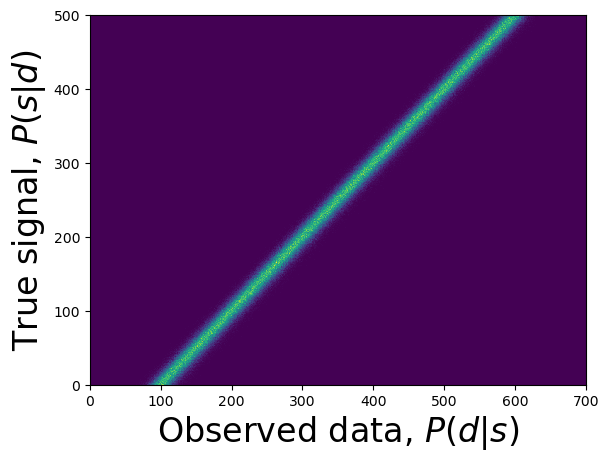

In [22]:
data = bkgrnd + true_signal

signaledges = np.linspace(0,500,501)
dataedges = np.linspace(0,700,701)

Psd, temp, temp2= np.histogram2d(data,true_signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

In [55]:
true_signal = 191
true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= true_signal and signaledges[i+1] >= true_signal:
        true_signal_bin_idx = i
        break
        

true_signal_probs = Psd[::5, true_signal_bin_idx]

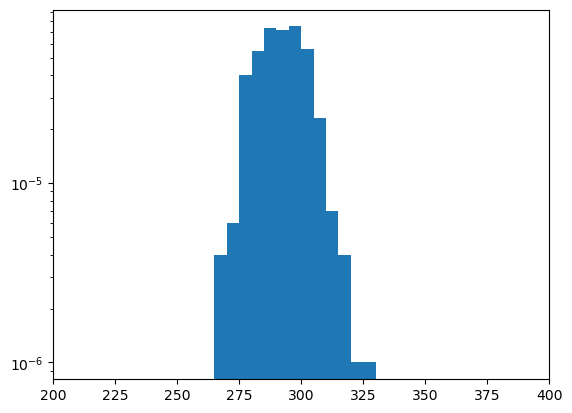

In [56]:
dataedges = np.linspace(0,700,141)
plt.xlim(200,400)
plt.stairs(true_signal_probs, dataedges, fill = True)
plt.yscale('log')
